# Домашні завдання Pandas

In [2]:
import numpy as np
import pandas as pd

## Частина перша: Знайомство з Pandas

Прочитайте дані за допомогою методу read_html з таблиці "Коефіцієнт народжуваності в регіонах України (1950—2019)" посилання

Необхідно виконати:

*    Вивести перші рядки таблиці за допомогою методу head
*    Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
*    Замініть у таблиці значення "—" на значення NaN
*    Визначте типи всіх стовпців за допомогою dataframe.dtypes
*   Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
*    Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
*    Видаліть з таблиці дані по всій країні, останній рядок таблиці
*    Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
*    Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
*    У якому регіоні була найвища народжуваність у 2014 році?
*    Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Регіон  28 non-null     object 
 1   1950    26 non-null     float64
 2   1960    27 non-null     float64
 3   1970    27 non-null     float64
 4   1990    28 non-null     int64  
 5   2000    28 non-null     int64  
 6   2012    28 non-null     int64  
 7   2014    28 non-null     object 
 8   2019    28 non-null     object 
dtypes: float64(3), int64(3), object(3)
memory usage: 2.1+ KB
None

Вивести перші рядки таблиці за допомогою методу head
  
             Регіон   1950   1960   1970  1990  2000  2012 2014 2019
0              Крим  230.0  206.0  160.0   130    73   126    —    —
1         Вінницька  224.0  192.0  142.0   124    84   112  109   76
2         Волинська  247.0  250.0  179.0   153   112   148  141  101
3  Дніпропетровська  204.0  204.0  151.0   123    71   112  111   71
4          Донецька  2

'Ok'

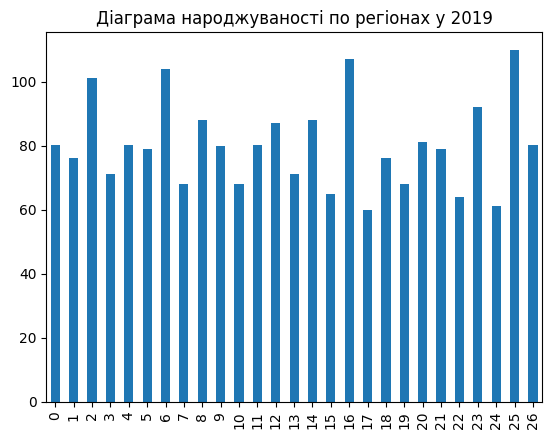

In [3]:
def w01():
  url = "https://uk.wikipedia.org/wiki/%D0%9D%D0%B0%D1%81%D0%B5%D0%BB%D0%B5%D0%BD%D0%BD%D1%8F_%D0%A3%D0%BA%D1%80%D0%B0%D1%97%D0%BD%D0%B8#%D0%9D%D0%B0%D1%80%D0%BE%D0%B4%D0%B6%D1%83%D0%B2%D0%B0%D0%BD%D1%96%D1%81%D1%82%D1%8C"
  dfs = pd.read_html(url)
  n = -1
  for i, df in enumerate(dfs):
    if df.columns.tolist() == ['Регіон', '1950', '1960', '1970', '1990', '2000', '2012', '2014', '2019']:
      n = i
      break
  if n == -1:
    print("Таблицю не знайдено")
    return None

  print(df.info())

  # Вивести перші рядки таблиці за допомогою методу head
  print("""
Вивести перші рядки таблиці за допомогою методу head
  """)
  print(df.head())

  # Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
  print("""
Визначте кількість рядків та стовпців у датафреймі (атрибут shape)
  """)
  nrows = df.shape[0]
  ncols = df.shape[1]
  print(f"Рядків: {nrows}, Стовпців: {ncols}")

  # Замініть у таблиці значення "—" на значення NaN
  print("""
Замініть у таблиці значення "—" на значення NaN
  """)
  df = df.replace("—", np.nan)
  print(df.head())

  # Визначте типи всіх стовпців за допомогою dataframe.dtypes
  print("""
Визначте типи всіх стовпців за допомогою dataframe.dtypes
  """)
  print(df.dtypes)

  # Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
  print("""
Замініть типи нечислових колонок на числові. Підказка - це колонки, де знаходився символ "—"
  """)
  for cname in df.columns.to_list()[1:]:
    if df.dtypes[cname] not in [float]:
      df[cname] = pd.to_numeric(df[cname], errors='coerce', downcast='float')
  print(df.dtypes)
  print(df.head())

  # Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
  print("""
Порахуйте, яка частка пропусків міститься в кожній колонці (використовуйте методи isnull та sum)
  """)
  for cname in df.columns.to_list():
    print(f"{cname} - частка пропусків: {df[cname].isnull().sum()}/{len(df[cname])}={round(df[cname].isnull().sum()/len(df[cname])*100, 2)}%")

  # Видаліть з таблиці дані по всій країні, останній рядок таблиці
  print("""
Видаліть з таблиці дані по всій країні, останній рядок таблиці
  """)
  df_tot = df[-1:]
  print(df_tot)
  df = df[:-1]
  print(len(df))

  # Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
  print("""
Замініть відсутні дані в стовпцях середніми значеннями цих стовпців (метод fillna)
  """)
  for cname in df.columns.to_list()[1:]:
    df[cname] = df[cname].fillna(df[cname].mean(skipna=True))
  #print(df)

  # Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
  print("""
Отримайте список регіонів, де рівень народжуваності у 2019 році був вищим за середній по Україні
  """)
  print(df[df['2019'] > df_tot.iloc[0]['2019']]['Регіон'])

  # У якому регіоні була найвища народжуваність у 2014 році?
  print("""
У якому регіоні була найвища народжуваність у 2014 році?
  """)
  print(df[df['2014'] == df['2014'].max()]['Регіон'])

  # Побудуйте стовпчикову діаграму народжуваності по регіонах у 2019 році
  print("""

  """)
  df['2019'].plot(kind='bar', title='Діаграма народжуваності по регіонах у 2019')

  return "Ok"

w01()